### Çağıl Peköz 17330172

# Task 1

In [149]:
%matplotlib inline

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

## Dataset Loaded in

In [150]:
dataset = pd.read_csv('dataset.csv')

## Original Dataset

In [151]:
dataset

,ClassLabel,Gender,Age,Race,Education,FamilyHistory,HighBloodSugar,BMI,WaistCircumference,SystolicBP,DiastolicBP,LDL,HDL,Triglycerides
0,Negative,1,44,3,3.0,1,1,29.10,106.6,119,88,113,37,235
1,Negative,2,44,1,2.0,2,1,25.06,82.3,130,86,138,63,61
2,Negative,1,22,3,5.0,1,1,28.07,94.5,120,87,96,57,111
3,Negative,2,35,3,4.0,1,1,20.29,71.9,110,64,93,89,58
4,Negative,1,54,2,5.0,2,1,36.32,116.4,92,42,110,62,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,Positive,2,59,3,3.0,2,1,26.67,103.0,110,60,132,47,190
1499,Positive,2,74,3,NaN,2,1,25.08,95.5,135,60,114,36,270
1500,Positive,2,80,3,2.0,1,1,NaN,119.3,121,40,111,38,131
1501,Positive,2,78,3,4.0,2,1,46.98,129.5,146,78,136,56,144


## Checking which columns have missing Data
By running the below code, we can see that Education and BMI has missing data.

In [152]:
dataset.isnull().sum()

ClassLabel             0
Gender                 0
Age                    0
Race                   0
Education             12
FamilyHistory          0
HighBloodSugar         0
BMI                    9
WaistCircumference     0
SystolicBP             0
DiastolicBP            0
LDL                    0
HDL                    0
Triglycerides          0
dtype: int64

## For example, 150th row of BMI has no data

In [153]:
dataset.loc[150,'BMI']

nan

## Filling in missing BMI data by Mean and Education by Most Frequent Value
BMI value can be a float, so we can use mean to impute missing data.By running the print command, we can see that the missing values are filled in with mean.

In [154]:
dataset['BMI'].fillna(dataset['BMI'].mean(), inplace=True)
dataset['Education'].fillna(dataset['Education'].value_counts().index[0], inplace=True)
dataset.isnull().sum()

ClassLabel            0
Gender                0
Age                   0
Race                  0
Education             0
FamilyHistory         0
HighBloodSugar        0
BMI                   0
WaistCircumference    0
SystolicBP            0
DiastolicBP           0
LDL                   0
HDL                   0
Triglycerides         0
dtype: int64

## Checking the 150th row again

In [155]:
dataset.loc[150,'BMI']

28.41636546184739

## Number of Positives and Negatives

In [156]:
dataset['ClassLabel'].value_counts()

Negative    775
Positive    728
Name: ClassLabel, dtype: int64

## Number of Positives and Gender==1 and Race==2

In [157]:
len(dataset[(dataset['ClassLabel']=='Positive') & (dataset['Gender']==1) & (dataset['Race']==2)])

40

## Race that is most frequent in Negative samples

In [158]:
negativeData = dataset[(dataset['ClassLabel']=='Negative')]
negativeData

,ClassLabel,Gender,Age,Race,Education,FamilyHistory,HighBloodSugar,BMI,WaistCircumference,SystolicBP,DiastolicBP,LDL,HDL,Triglycerides
0,Negative,1,44,3,3.0,1,1,29.10,106.6,119,88,113,37,235
1,Negative,2,44,1,2.0,2,1,25.06,82.3,130,86,138,63,61
2,Negative,1,22,3,5.0,1,1,28.07,94.5,120,87,96,57,111
3,Negative,2,35,3,4.0,1,1,20.29,71.9,110,64,93,89,58
4,Negative,1,54,2,5.0,2,1,36.32,116.4,92,42,110,62,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,Negative,2,53,2,5.0,2,1,20.09,75.0,94,60,148,67,72
771,Negative,1,56,3,5.0,1,1,30.89,113.1,120,83,139,65,84
772,Negative,2,67,1,4.0,2,1,20.37,71.6,150,80,95,60,138
773,Negative,2,34,2,1.0,1,1,38.74,117.4,107,67,91,34,60


In [159]:
negativeData['Race'].value_counts()

3    404
1    127
4    117
2     86
5     41
Name: Race, dtype: int64

## Average BMI of samples with Education==3

In [160]:
education_ft = dataset[(dataset['Education']==3)]
education_ft['BMI'].mean()

29.276166255235008

## Average BMI of Gender==1

In [161]:
gender_filter = dataset[(dataset['Gender']==1)]
gender_filter['BMI'].mean()

28.49773850117451

## Average BMI of Gender==2

In [162]:
gender_filter = dataset[(dataset['Gender']==2)]
gender_filter['BMI'].mean()

28.347488282367802

# Task 2

## Seperating Categorical and Numerical
Because that datatypes of columns are given not correctly, the columns are seperated manually.

#### Seperating Categorical Columns

In [163]:
categorical_dataset = dataset[['ClassLabel','Gender','Race','Education','FamilyHistory','HighBloodSugar']]
categorical_dataset

,ClassLabel,Gender,Race,Education,FamilyHistory,HighBloodSugar
0,Negative,1,3,3.0,1,1
1,Negative,2,1,2.0,2,1
2,Negative,1,3,5.0,1,1
3,Negative,2,3,4.0,1,1
4,Negative,1,2,5.0,2,1
...,...,...,...,...,...,...
1498,Positive,2,3,3.0,2,1
1499,Positive,2,3,4.0,2,1
1500,Positive,2,3,2.0,1,1
1501,Positive,2,3,4.0,2,1


#### Seperating Numerical Values

In [164]:
numerical_dataset = dataset[['Age','BMI','WaistCircumference','SystolicBP','DiastolicBP','LDL','HDL','Triglycerides']]
numerical_dataset

,Age,BMI,WaistCircumference,SystolicBP,DiastolicBP,LDL,HDL,Triglycerides
0,44,29.100000,106.6,119,88,113,37,235
1,44,25.060000,82.3,130,86,138,63,61
2,22,28.070000,94.5,120,87,96,57,111
3,35,20.290000,71.9,110,64,93,89,58
4,54,36.320000,116.4,92,42,110,62,71
...,...,...,...,...,...,...,...,...
1498,59,26.670000,103.0,110,60,132,47,190
1499,74,25.080000,95.5,135,60,114,36,270
1500,80,28.416365,119.3,121,40,111,38,131
1501,78,46.980000,129.5,146,78,136,56,144


## Boxplots for Classes with respect to each Variable

#### Age

<AxesSubplot:xlabel='ClassLabel', ylabel='Age'>

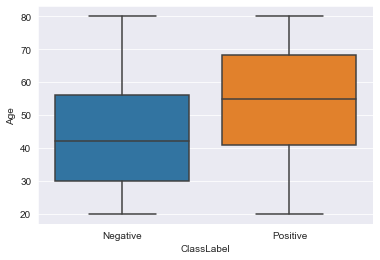

In [165]:
sns.set_style("darkgrid")
sns.boxplot(data=dataset, x='ClassLabel', y=numerical_dataset.columns[0])

<AxesSubplot:xlabel='ClassLabel', ylabel='BMI'>

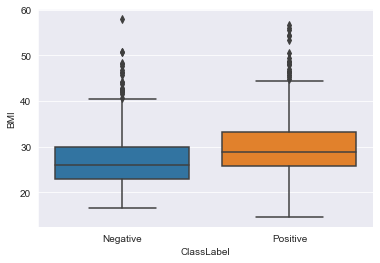

In [166]:
sns.boxplot(data=dataset, x='ClassLabel', y=numerical_dataset.columns[1])

<AxesSubplot:xlabel='ClassLabel', ylabel='WaistCircumference'>

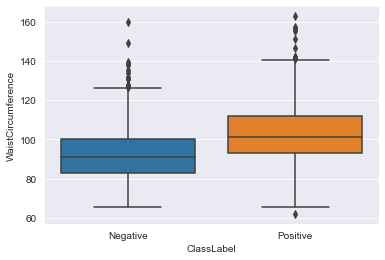

In [167]:
sns.boxplot(data=dataset, x='ClassLabel', y=numerical_dataset.columns[2])

<AxesSubplot:xlabel='ClassLabel', ylabel='SystolicBP'>

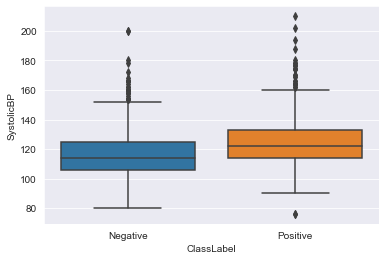

In [168]:
sns.boxplot(data=dataset, x='ClassLabel', y=numerical_dataset.columns[3])

<AxesSubplot:xlabel='ClassLabel', ylabel='DiastolicBP'>

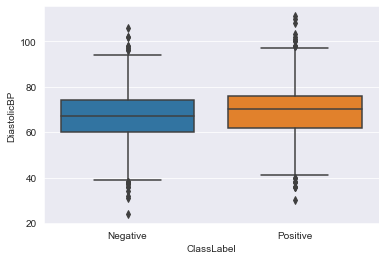

In [169]:
sns.boxplot(data=dataset, x='ClassLabel', y=numerical_dataset.columns[4])

<AxesSubplot:xlabel='ClassLabel', ylabel='LDL'>

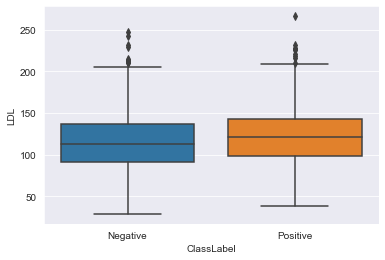

In [170]:
sns.boxplot(data=dataset, x='ClassLabel', y=numerical_dataset.columns[5])

<AxesSubplot:xlabel='ClassLabel', ylabel='HDL'>

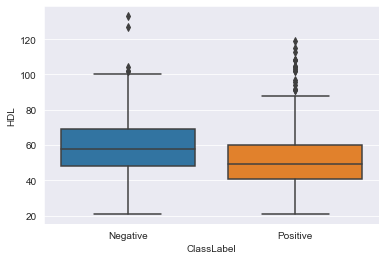

In [171]:
sns.boxplot(data=dataset, x='ClassLabel', y=numerical_dataset.columns[6])

<AxesSubplot:xlabel='ClassLabel', ylabel='Triglycerides'>

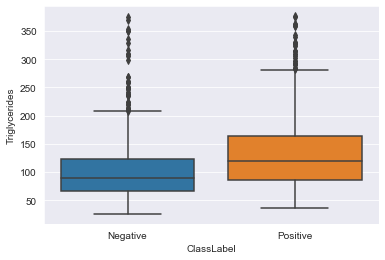

In [172]:
sns.boxplot(data=dataset, x='ClassLabel', y=numerical_dataset.columns[7])

## Table of Quartiles (Q1,Q2/Median,Q3) for each numerical value 

In [173]:
q1_list = [] ; q2_list = [] ; q3_list = []

for column in numerical_dataset:
    q1 = dataset[column].quantile(0.25)
    q2 = dataset[column].mean()
    q3 = dataset[column].quantile(0.75)
    q1_list.append(q1)
    q2_list.append(q2)
    q3_list.append(q3)

quartiles = {}
quartiles['index']=numerical_dataset.columns.tolist()
quartiles['Q1']=q1_list
quartiles['Q2']=q2_list
quartiles['Q3']=q3_list

quartiles_df = pd.DataFrame(quartiles, index=quartiles['index'], columns=['Q1','Q2','Q3'])
quartiles_df

,Q1,Q2,Q3
Age,34.00,49.231537,63.000
BMI,24.16,28.416365,31.715
WaistCircumference,86.50,97.555888,106.350
SystolicBP,108.00,120.359947,130.000
DiastolicBP,61.00,68.152362,76.000
LDL,94.00,118.815702,140.000
HDL,44.00,55.480373,65.000
Triglycerides,75.00,117.979375,146.000


## Number of Outliers for each continous variable

In [174]:
print('---Amount of Outliers---')
for index in quartiles_df.index:
    q1 = quartiles_df.loc[index,'Q1']
    q2 = quartiles_df.loc[index,'Q2']
    q3 = quartiles_df.loc[index,'Q3']

    iqr = q3 - q1

    upper_limit = q3 + 1.5*iqr
    lower_limit = q1 - 1.5*iqr

    print (index+': '+str(len(dataset[(dataset[index]> upper_limit) | (dataset[index] < lower_limit)])))

---Amount of Outliers---
Age: 0
BMI: 42
WaistCircumference: 22
SystolicBP: 32
DiastolicBP: 30
LDL: 19
HDL: 24
Triglycerides: 59


# Task 3

## BarPlot for each categorical variable

<AxesSubplot:ylabel='ClassLabel'>

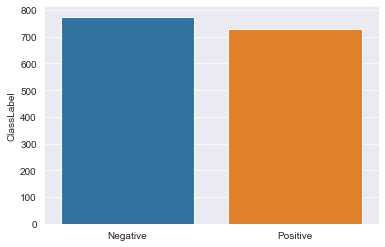

In [175]:
sns.barplot(x=categorical_dataset.iloc[:, 0].value_counts().index, y=categorical_dataset.iloc[:, 0].value_counts())

<AxesSubplot:ylabel='Gender'>

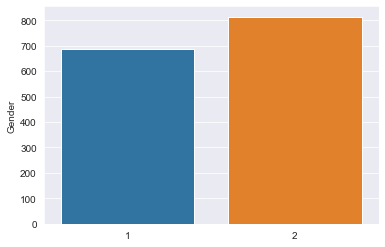

In [176]:
sns.barplot(x=categorical_dataset.iloc[:, 1].value_counts().index, y=categorical_dataset.iloc[:, 1].value_counts())

<AxesSubplot:ylabel='Race'>

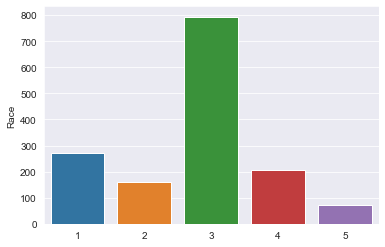

In [177]:
sns.barplot(x=categorical_dataset.iloc[:, 2].value_counts().index, y=categorical_dataset.iloc[:, 2].value_counts())

<AxesSubplot:ylabel='Education'>

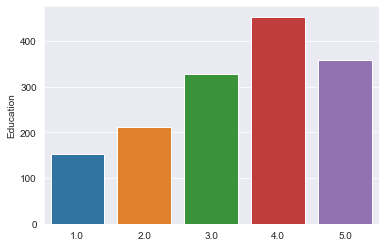

In [178]:
sns.barplot(x=categorical_dataset.iloc[:, 3].value_counts().index, y=categorical_dataset.iloc[:, 3].value_counts())

<AxesSubplot:ylabel='FamilyHistory'>

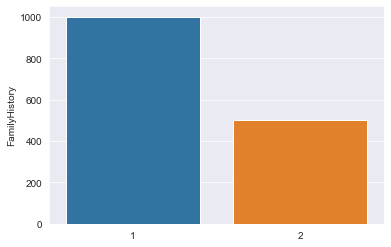

In [179]:
sns.barplot(x=categorical_dataset.iloc[:, 4].value_counts().index, y=categorical_dataset.iloc[:, 4].value_counts())

<AxesSubplot:ylabel='HighBloodSugar'>

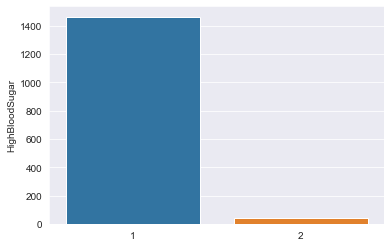

In [180]:
sns.barplot(x=categorical_dataset.iloc[:, 5].value_counts().index, y=categorical_dataset.iloc[:, 5].value_counts())

# Task 4

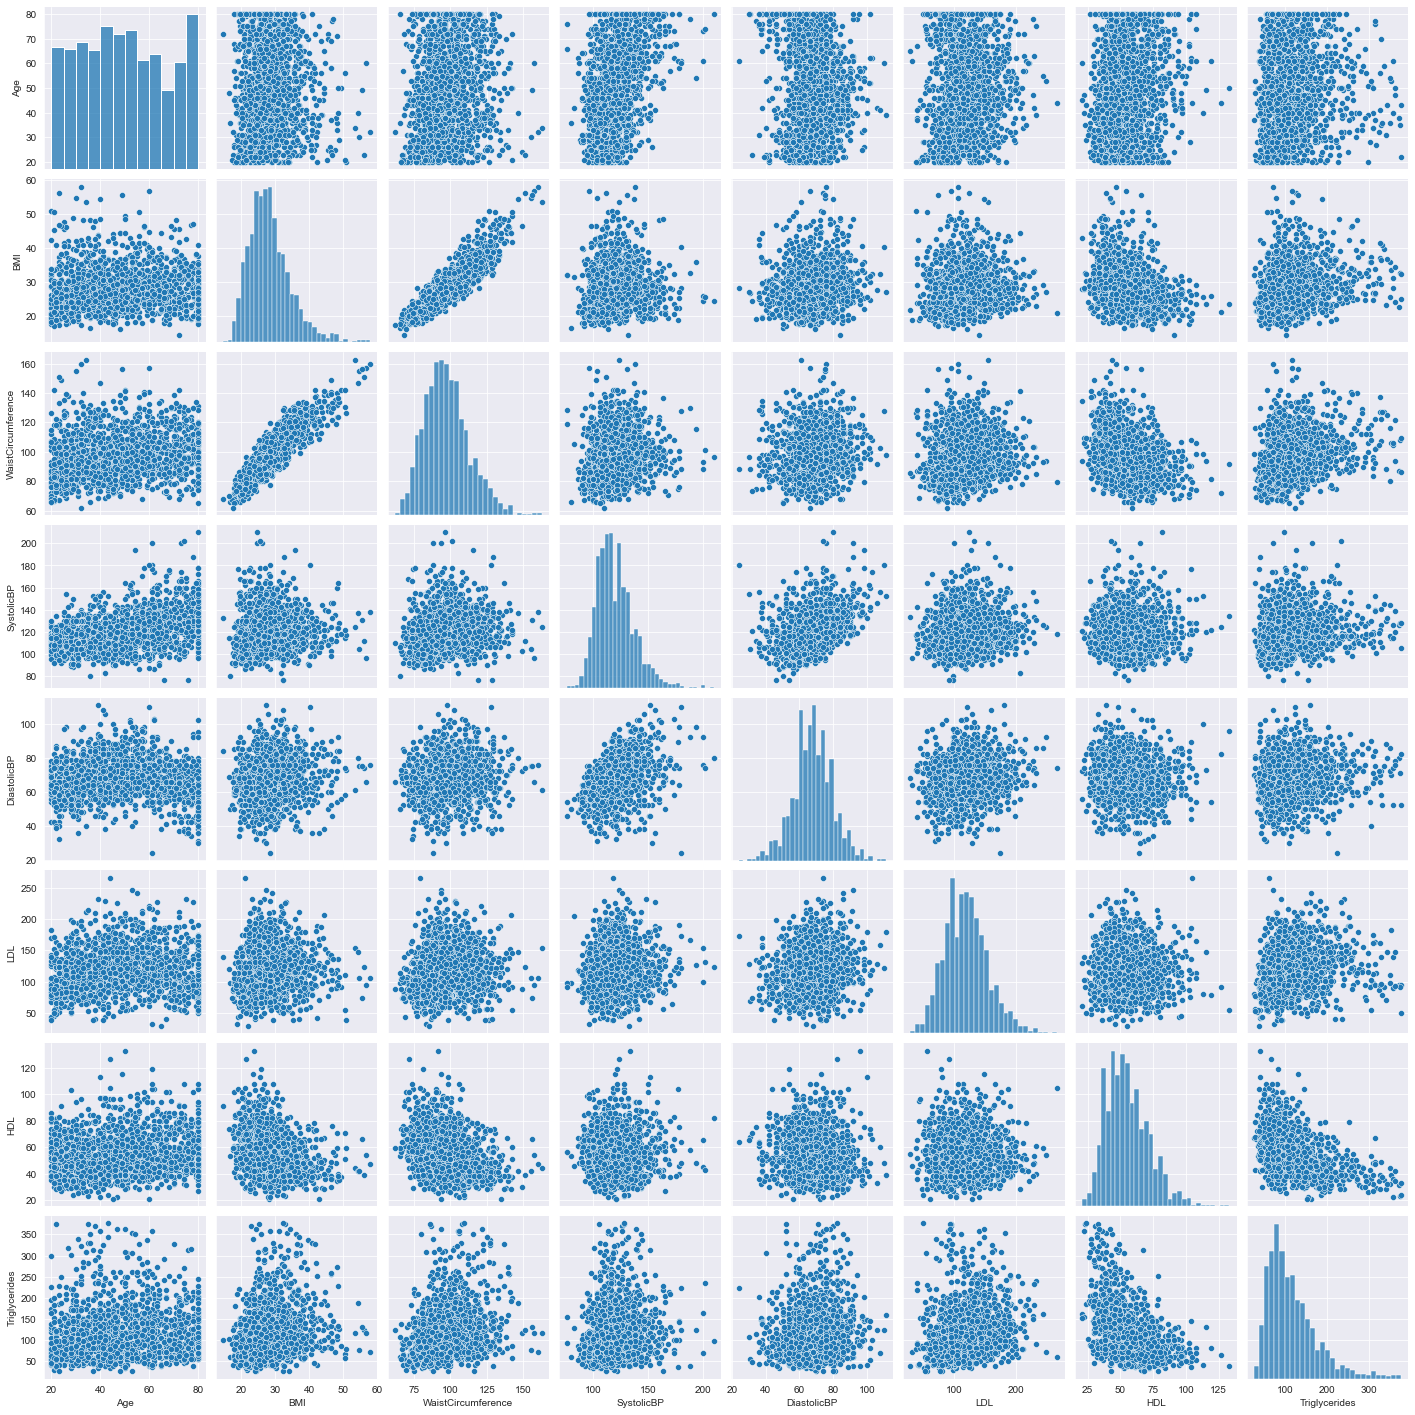

In [181]:
sns.pairplot(numerical_dataset)